In [9]:
!pip install -r requirements.txt

  Using cached cycler-0.11.0-py3-none-any.whl.metadata (785 bytes)
  Using cached fonttools-4.29.1-py3-none-any.whl.metadata (119 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached kiwisolver-1.3.2.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.5.1.tar.gz (35.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-1.22.2.zip (11.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached packaging-21.3-py3-none-any.whl.metadata (15 kB)
  Using cached pandas-1.4.1.tar.gz (4.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Pillow-9.0.1.tar.gz (49.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached pyparsing-3.0.7-py3-none-any.wh

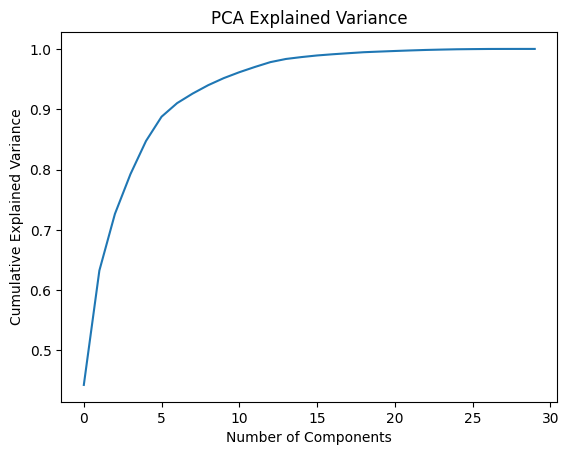

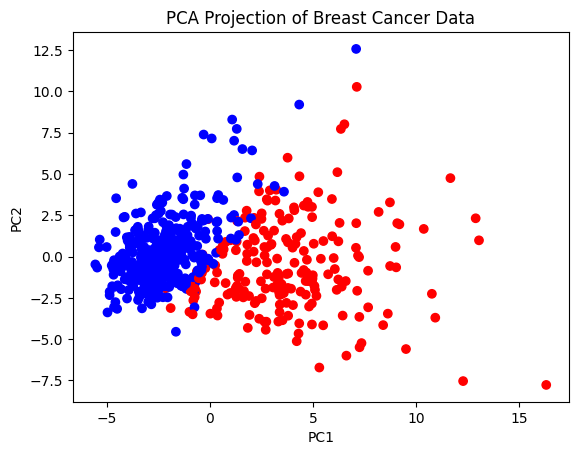

Explained Variance Ratio (2 components): [0.44272026 0.18971182]
Total Explained Variance (2 components): 0.6324320765155944


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Load data
data = pd.read_csv('/content/data.csv')
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with all components
pca_full = PCA()
pca_full.fit(X_scaled)

# Plot cumulative explained variance
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.savefig('pca_variance.png')
plt.show()

# Apply PCA with 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Visualize PCA projection
colors = {'M': 'red', 'B': 'blue'}
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=data['diagnosis'].map(colors))
plt.title('PCA Projection of Breast Cancer Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('pca_projection.png')
plt.show()

# Print explained variance ratio
print(f'Explained Variance Ratio (2 components): {pca_2.explained_variance_ratio_}')
print(f'Total Explained Variance (2 components): {sum(pca_2.explained_variance_ratio_)}')